# Lesson 15 Activity: Data Wrangling

## Learning Objectives

This activity will help you to:

1. Merge and aggregate data from multiple sources
2. Apply groupby operations to summarize data
3. Calculate meaningful statistics from aggregated data
4. Visualize aggregated results

## Setup

Import the required libraries.

In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats
from sklearn.impute import KNNImputer

## Exercise 1: Merge Data and Calculate Monthly Sales

**Tasks**:

1. Merge `df_sales` and `df_dates` on the `transaction_id` column. Store the result in a dataframe called `df_transactions`.

2. Extract the month from the `sale_date` column and add it as a new column called `month` in `df_transactions`.

3. Calculate the total sales per month using groupby and sum. Store the result in a dataframe called `monthly_sales`.

4. Create a bar chart showing the total sales for each month. Include appropriate labels and title.

**Hints**:

- To merge two dataframes, use `pd.merge()` or the `.merge()` method. You can specify the column to join on with the `on` parameter.
  - Example: `df_merged = pd.merge(df1, df2, on='key_column')`
  - Or: `df_merged = df1.merge(df2, on='key_column')`

- To extract the month from a datetime column, use the `.dt.month` accessor.
  - Example: `df['month'] = df['date_column'].dt.month`

- To group by a column and calculate the sum, use `.groupby()` followed by `.sum()`.
  - Example: `grouped_df = df.groupby('group_column')['value_column'].sum()`
  - You can also use `.reset_index()` to convert the result back to a regular dataframe.

In [2]:
df_sales = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/sale_amounts.csv')
df_dates = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/sales_by_date.csv')

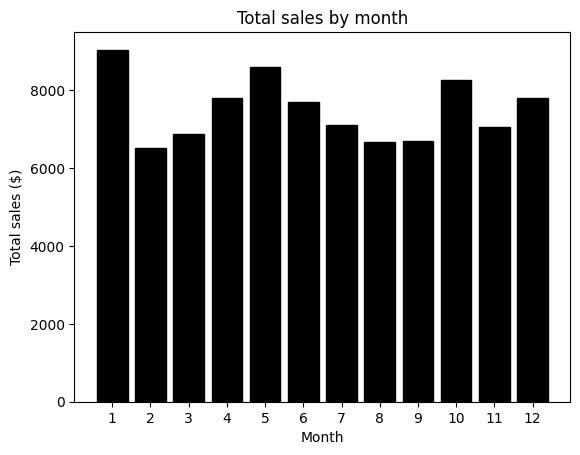

In [3]:
# Merge df_sales and df_dates on transaction_id
df_transactions = pd.merge(df_sales, df_dates, on='transaction_id')

# Extract month from sale_date and add as new column
df_transactions['sale_date'] = pd.to_datetime(df_transactions['sale_date'])
df_transactions['month'] = df_transactions['sale_date'].dt.month

# Sort by month to ensure correct order in the plot
df_transactions = df_transactions.sort_values(by='month')

# Calculate total sales per month
monthly_sales = df_transactions.groupby('month')['sale_amount'].sum().reset_index()

# 4. Create bar chart
plt.bar(monthly_sales['month'], monthly_sales['sale_amount'], color='black', edgecolor='black')
plt.xlabel('Month')
plt.ylabel('Total sales ($)')
plt.title('Total sales by month')
plt.xticks(monthly_sales['month'])

plt.show()

## Exercise 2: Analyze Missing Data Patterns

Load the California Housing dataset with missing values and investigate whether the pattern of missing data in the `HouseAge` feature is related to the `Population` feature.

**Background**: 
Sometimes data is not missing completely at random. In real-world scenarios, certain values might be more likely to be missing based on other features in the dataset. This is called Missing Not At Random (MNAR). Understanding these patterns is important for choosing appropriate imputation strategies.

**Tasks**:

1. Load the dataset from `salted_housing_data.csv` and examine the first few rows.

2. Create a new boolean column called `HouseAge_Missing` that indicates whether `HouseAge` is missing (True) or not (False).

3. Use `pd.qcut()` to bin the `Population` feature into 4 quartiles. Store the result in a new column called `Population_Quartile`. Use labels like `['Q1 (Lowest)', 'Q2', 'Q3', 'Q4 (Highest)']`.

4. Calculate the percentage of missing `HouseAge` values for each population quartile. Use `groupby()` to group by `Population_Quartile` and calculate:
   - The count of missing values (sum of `HouseAge_Missing`)
   - The total count in each quartile
   - The percentage missing

5. Create a bar chart showing the percentage of missing `HouseAge` values by population quartile. Add value labels on top of each bar.

6. Based on your analysis, answer: Is `HouseAge` more likely to be missing in certain population groups? What does this suggest about the missing data mechanism?

**Hints**:

- To check for missing values, use `.isnull()` or `.isna()`.
  - Example: `df['HouseAge_Missing'] = df['HouseAge'].isnull()`

- To create quartile bins, use `pd.qcut()` with `q=4`.
  - Example: `df['quartile'] = pd.qcut(df['column'], q=4, labels=['Q1', 'Q2', 'Q3', 'Q4'])`

- To calculate percentage missing by group:
  - Group by the quartile column
  - Use `.agg()` with multiple functions: `{'HouseAge_Missing': ['sum', 'count']}`
  - Calculate percentage: `(sum / count) * 100`

- Missing data mechanisms:
  - **MCAR** (Missing Completely At Random): No relationship between missingness and any variable
  - **MAR** (Missing At Random): Missingness depends on observed variables
  - **MNAR** (Missing Not At Random): Missingness depends on the missing value itself or unobserved variables

In [4]:
housing_df = pd.read_csv('https://gperdrizet.github.io/FSA_devops/assets/data/unit2/salted_housing_data.csv')

In [5]:
# 1. Examine the first few rows
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,NaN,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,NaN,565.0,2.181467,37.85,NaN,3.422


In [6]:
# 2. Create boolean column indicating if HouseAge is missing
housing_df['HouseAge_Missing'] = housing_df['HouseAge'].isnull()
housing_df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal,HouseAge_Missing
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526,False
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585,False
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,NaN,3.521,False
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413,False
4,3.8462,52.0,6.281853,NaN,565.0,2.181467,37.85,NaN,3.422,False


In [7]:
# 3. Bin Population into quartiles
housing_df['Population_Quartile'] = pd.qcut(
    housing_df['Population'],
    q=4,
    labels=['Q1', 'Q2', 'Q3', 'Q4']
)

In [8]:
# 4. Calculate percentage of missing HouseAge values by quartile
missing_by_quartile = housing_df.groupby('Population_Quartile', observed=False)['HouseAge_Missing'].agg(['sum', 'count'])
missing_by_quartile['percentage_missing'] = (missing_by_quartile['sum'] / missing_by_quartile['count']) * 100
missing_by_quartile.head()

,sum,count,percentage_missing
Population_Quartile,,,
Q1,36,4279,0.841318
Q2,36,4262,0.844674
Q3,35,4270,0.819672
Q4,44,4264,1.031895


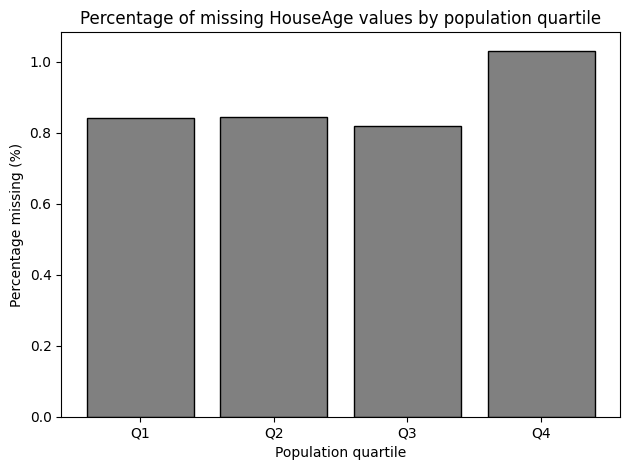

In [9]:
# 5. Create bar chart
plt.title('Percentage of missing HouseAge values by population quartile')

plt.bar(
    missing_by_quartile.index.astype(str),
    missing_by_quartile['percentage_missing'],
    color='grey',
    edgecolor='black'
)
plt.xlabel('Population quartile')
plt.ylabel('Percentage missing (%)')

plt.tight_layout()
plt.show()

## Exercise 3: Apply Imputation to Missing Data

Now that you've analyzed the missing data pattern, select and apply an appropriate imputation method to fill in the missing `HouseAge` values.

**Background**:
Based on your findings from Exercise 2, you discovered that `HouseAge` is more likely to be missing in areas with lower population (MNAR pattern). This information should guide your choice of imputation method. Advanced methods like KNN or Iterative Imputation can leverage relationships between features, which is particularly useful when data is not missing completely at random.

**Tasks**:

1. Choose an imputation method. Consider:
   - Simple methods: Mean or Median imputation
   - Advanced methods: KNN Imputation or Iterative Imputation
   - Justify your choice based on the missing data pattern you discovered
2. Apply your chosen imputation method to fill the missing `HouseAge` values. Store the result in a new column called `HouseAge_imputed`.

3. Compare the distribution of the original `HouseAge` (non-missing values only) with the imputed values:
   - Create a histogram showing both distributions
   - Calculate summary statistics (mean, median, std) for both

4. Evaluate your imputation:
   - Does the imputed distribution look reasonable compared to the original?
   - Are there any obvious problems or artifacts introduced by the imputation?
   - Would a different method have been better? Why or why not?

**1. Choose imputation method**

Use KNN imputation so that missing values are filled in based on similar records.

In [11]:
# 2. Apply KNN imputation
housing_df.drop(['HouseAge_Missing', 'Population_Quartile'], axis=1, inplace=True)

imputer = KNNImputer()
housing_imputed = imputer.fit_transform(housing_df)
imputed_housing_df = pd.DataFrame(housing_imputed, columns=housing_df.columns)


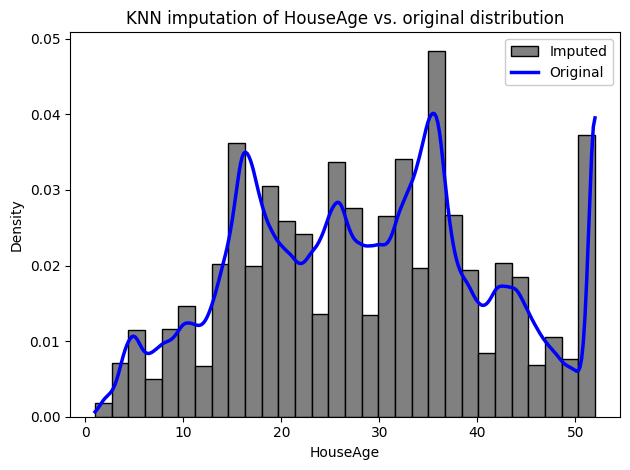

In [16]:
# Create KDE of original distribution
kde_original = stats.gaussian_kde(housing_df['HouseAge'].dropna(), bw_method=0.05)
x_range = np.linspace(housing_df['HouseAge'].min(), housing_df['HouseAge'].max(), 300)
kde_values = kde_original(x_range)

plt.title('KNN imputation of HouseAge vs. original distribution')
plt.hist(
    imputed_housing_df['HouseAge'],
    bins=30, edgecolor='black', color='grey',
    density=True, label='Imputed'
)

plt.plot(
    x_range, kde_values,
    'b-', linewidth=2.5,
    label='Original'
)

plt.xlabel('HouseAge')
plt.ylabel('Density')
plt.legend(loc='upper right', framealpha=1, markerscale=3)

plt.tight_layout()
plt.show()